In [1]:
import math, os, sys
#import pickle
from glob import glob
import numpy as np
from numpy.random import random, permutation, randn, normal
from matplotlib import pyplot as plt
%matplotlib inline
import PIL
from PIL import Image
#import bcolz
from shutil import copyfile
from shutil import move

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input,  GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.metrics import categorical_crossentropy
from keras.regularizers import l2,l1

Using TensorFlow backend.


In [2]:
from keras.models import model_from_json
# load json and create model
json_file = open('/media/barath/DE3669CE3669A7EB/shruthi_636/files_to_run/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/media/barath/DE3669CE3669A7EB/shruthi_636/files_to_run/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [3]:
import cv2
#reading the images 
train_path = '/media/barath/DE3669CE3669A7EB/shruthi_636/files_to_run/train/'
X_data = []
reg_im_input = []
sub_folders = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']

for sub in sub_folders:
    images = os.listdir(train_path+sub)
    for im in images:
        image = np.array(Image.open(train_path+sub+'/'+im).resize((150,150),Image.ANTIALIAS))
        X_data.append(image)
        
##reg_input = X_data.transpose(0,3,1,2) 
X_data = np.array(X_data)

In [4]:
X_data.shape

(22424, 150, 150, 3)

In [5]:
reg_data = np.transpose(X_data, (0, 3,1,2))

In [6]:
reg_data.shape

(22424, 3, 150, 150)

In [7]:
from keras import backend
backend.set_image_data_format('channels_last')

In [8]:
#predicting co-ordinates 
coordinate_prediction = loaded_model.predict(reg_data)
coordinate_prediction.shape

(22424, 8)

In [9]:
scaled_coordinates = coordinate_prediction
scaled_coordinates.shape

(22424, 8)

In [10]:
#scaling the co-ordinates
x_ratio = 150/640
y_ratio = 150/480
for i in range(len(coordinate_prediction)):
    scaled_coordinates[i][0] = x_ratio*coordinate_prediction[i][0]
    scaled_coordinates[i][1] = y_ratio*coordinate_prediction[i][1]
    scaled_coordinates[i][2] = x_ratio*coordinate_prediction[i][2]
    scaled_coordinates[i][3] = y_ratio*coordinate_prediction[i][3]
    scaled_coordinates[i][4] = x_ratio*coordinate_prediction[i][4]
    scaled_coordinates[i][5] = y_ratio*coordinate_prediction[i][5]
    scaled_coordinates[i][6] = x_ratio*coordinate_prediction[i][6]    
    scaled_coordinates[i][7] = y_ratio*coordinate_prediction[i][7]

In [11]:
scaled_coordinates[0]

array([16.29969 , 10.780603, 34.507267, 11.29922 , 33.780224, 16.296728,
       37.192875, 32.660995], dtype=float32)

In [82]:
scaled_coordinates[0][3]

11.29922

In [13]:
from PIL import Image



num_samples = 22424 
stacked_train_X = []
for i in range(22424):
    if int(scaled_coordinates[i][1])-15 > 0:
        y_min = int(scaled_coordinates[i][1])-15
    else:
        y_min = 0
    if int(scaled_coordinates[i][1])+14 < 150:
        y_max = int(scaled_coordinates[i][1])+14
    else:
        y_max = 150
    if int(scaled_coordinates[i][0])-15 > 0:
        x_min = int(scaled_coordinates[i][0])-15
    else:
        x_min = 0
    if int(scaled_coordinates[i][0])+14 < 150:
        x_max = int(scaled_coordinates[i][0])+14 
    else:
        x_max = 150
    temp = Image.fromarray(X_data[i], 'RGB')
    head_crop = temp.crop((x_min,y_min,x_max,y_max))
    new_im = Image.new("RGB", (30, 30))
    new_im.paste(head_crop)
    head_crop1 = np.array(new_im) 
    
    
    if int(scaled_coordinates[i][3])-15 > 0:
        y_min = int(scaled_coordinates[i][3])-15
    else:
        y_min = 0
    if int(scaled_coordinates[i][3])+14 < 150:
        y_max = int(scaled_coordinates[i][3])+14
    else:
        y_max = 150 
    if int(scaled_coordinates[i][2])-15 > 0:
        x_min = int(scaled_coordinates[i][2])-155
    else:
        x_min = 0
    if int(scaled_coordinates[i][2])+14 < 150:
        x_max = int(scaled_coordinates[i][2])+14
    else:
        x_max = 150   
    temp1 = Image.fromarray(X_data[i], 'RGB')
    leftHand_crop = temp1.crop((x_min,y_min,x_max,y_max))
    new_im1 = Image.new("RGB", (30, 30))
    new_im1.paste(head_crop)
    leftHand_crop1 = np.array(new_im1) 
    
    
    if int(scaled_coordinates[i][5])-15 > 0:
        y_min = int(scaled_coordinates[i][5])-15
    else:
        y_min = 0
    if int(scaled_coordinates[i][5])+14 < 150:
        y_max = int(scaled_coordinates[i][5])+14
    else:
        y_max = 150
    if int(scaled_coordinates[i][4])-15 > 0:
        x_min = int(scaled_coordinates[i][4])-15
    else:
        x_min = 0
    if int(scaled_coordinates[i][4])+14 < 150:
        x_max = int(scaled_coordinates[i][4])+14
    else:
        x_max = 150   
    temp2 = Image.fromarray(X_data[i], 'RGB')
    steeringWheel_crop = temp2.crop((x_min,y_min,x_max,y_max))
    new_im2 = Image.new("RGB", (30, 30))
    new_im2.paste(head_crop)
    steeringWheel_crop1 = np.array(new_im2)
    
    
    if int(scaled_coordinates[i][7])-15 > 0:
        y_min = int(scaled_coordinates[i][7])-15
    else:
        y_min = 0
    if int(scaled_coordinates[i][7])+14 < 150:
        y_max = int(scaled_coordinates[i][7])+14
    else:
        y_max = 150
    if int(scaled_coordinates[i][6])-15 > 0:
        x_min = int(scaled_coordinates[i][6])-15
    else:
        x_min = 0
    if int(scaled_coordinates[i][6])+14 < 150:
        x_max = int(scaled_coordinates[i][6])+14
    else:
        x_max = 150   
    temp3 = Image.fromarray(X_data[i], 'RGB')
    rightHand_crop = temp3.crop((x_min,y_min,x_max,y_max))
    new_im3 = Image.new("RGB", (30, 30))
    new_im3.paste(head_crop)
    rightHand_crop1 = np.array(new_im3)
    
    
    stacked_image = np.vstack((np.vstack((np.vstack((head_crop1, leftHand_crop1)),steeringWheel_crop1)),rightHand_crop1))
    stacked_train_X.append(stacked_image)
stacked_train_X = np.array(stacked_train_X)

In [14]:
stacked_train_X.shape

(22424, 120, 30, 3)

In [15]:
resized_stacked_train_X = []
for i in range(22424):
    new_image = Image.new("RGB", (120, 120))
    temp_image = Image.fromarray(stacked_train_X[i], 'RGB')
    new_image.paste(temp_image)
    resized_stacked_train_X.append(np.array(new_image))
resized_stacked_train_X = np.array(resized_stacked_train_X) 
resized_stacked_train_X.shape
    



#new_im3.paste(head_crop)
#rightHand_crop1 = np.array(new_im3)

#im = Image.fromarray(rightHand_crop1)
#im.show()

(22424, 120, 120, 3)

In [16]:
#reading labels

#path_to_train_dataset = '/Users/Shruthi/Downloads/state-farm-distracted-driver-detection/imgs/train/'
#sub_folders = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
#count = len(os.listdir(path_to_train_dataset+'c0'))            
labels = []
for sub in sub_folders:
    count = len(os.listdir(train_path+sub))            
    labels = np.append(labels,np.repeat(sub[1],count))            


In [17]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [18]:
labels.shape

(22424, 10)

In [19]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    #shuffled_c = numpy.empty(c.shape, dtype=c.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
        #shuffled_c[new_index] = c[old_index]
    return shuffled_a, shuffled_b

In [20]:
train_X, train_Y = shuffle_in_unison(resized_stacked_train_X, labels)

In [21]:
train_X.shape

(22424, 120, 120, 3)

In [22]:
from keras.layers.convolutional import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.core import Flatten, Dense, Dropout


vgg_model = Sequential()
vgg_model.add(ZeroPadding2D((1,1),input_shape=(120,120,3)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))
vgg_model.add(Dropout(0.2))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Conv2D(64, (3, 3)))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))
vgg_model.add(Dropout(0.3))

vgg_model.add(Flatten())
vgg_model.add(Dense(4096))
vgg_model.add(Activation('relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(4096))
vgg_model.add(Activation('relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(10, activation='softmax'))
vgg_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 122, 122, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 118, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 118, 118, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 61, 61, 64)        0         
__________

In [23]:
from keras.optimizers import RMSprop

vgg_model.compile(RMSprop(lr=10e-6), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
import time
from keras.callbacks import ModelCheckpoint,TensorBoard, EarlyStopping

# checkpoint
filepath="/media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
#earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
#callbacks_list.append(earlystopping)
#tensorboard visulaization
tensorboard = TensorBoard(log_dir='/media/barath/DE3669CE3669A7EB/shruthi_636/logs_regclass/{}'.format(time.time()))
callbacks_list.append(tensorboard)

In [27]:
from matplotlib import pyplot as plt

def plot_history(Exp_history):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(Exp_history.history['acc'])
    plt.plot(Exp_history.history['val_acc'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.subplot(212)
    plt.plot(Exp_history.history['loss'])
    plt.plot(Exp_history.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epoches')
    plt.legend(['train', 'validation'], loc='upper left')
    #plt.savefig(results_path+'/train_history/Exp_train_history_1.png', bbox_inches='tight')
    plt.show()

In [28]:
x_test = train_X[18400:]
partial_x_train = train_X[:18400]
y_test = train_Y[18400:]
partial_y_train = train_Y[:18400]

In [99]:
history = vgg_model.fit(partial_x_train, partial_y_train, batch_size = 80, epochs = 40, verbose = 1, callbacks=callbacks_list , validation_split = 0.1)

Train on 16560 samples, validate on 1840 samples
Epoch 1/40
16560/16560 [==============================] - 53s 3ms/step - loss: 2.3074 - acc: 0.0999 - val_loss: 2.2999 - val_acc: 0.1038

Epoch 00001: val_acc improved from -inf to 0.10380, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_01-0.10.hdf5
Epoch 2/40
16560/16560 [==============================] - 52s 3ms/step - loss: 2.3020 - acc: 0.1050 - val_loss: 2.2988 - val_acc: 0.1038

Epoch 00002: val_acc did not improve from 0.10380
Epoch 3/40
16560/16560 [==============================] - 52s 3ms/step - loss: 2.2999 - acc: 0.1120 - val_loss: 2.2973 - val_acc: 0.1038

Epoch 00003: val_acc did not improve from 0.10380
Epoch 4/40
16560/16560 [==============================] - 52s 3ms/step - loss: 2.2993 - acc: 0.1097 - val_loss: 2.2955 - val_acc: 0.1049

Epoch 00004: val_acc improved from 0.10380 to 0.10489, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/

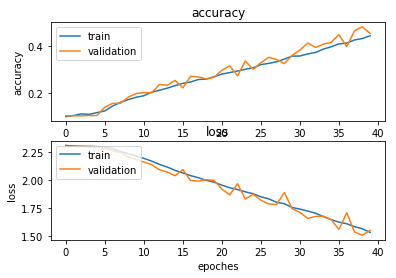

In [100]:
plot_history(history)

In [101]:
history1 = vgg_model.fit(partial_x_train, partial_y_train, batch_size = 80, epochs = 40, verbose = 1, callbacks=callbacks_list , validation_split = 0.1)

Train on 16560 samples, validate on 1840 samples
Epoch 1/40
16560/16560 [==============================] - 52s 3ms/step - loss: 1.5062 - acc: 0.4563 - val_loss: 1.7125 - val_acc: 0.3984

Epoch 00001: val_acc did not improve from 0.47989
Epoch 2/40
16560/16560 [==============================] - 52s 3ms/step - loss: 1.4923 - acc: 0.4626 - val_loss: 1.4191 - val_acc: 0.5098

Epoch 00002: val_acc improved from 0.47989 to 0.50978, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_02-0.51.hdf5
Epoch 3/40
16560/16560 [==============================] - 52s 3ms/step - loss: 1.4703 - acc: 0.4667 - val_loss: 1.4154 - val_acc: 0.5125

Epoch 00003: val_acc improved from 0.50978 to 0.51250, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_03-0.51.hdf5
Epoch 4/40
16560/16560 [==============================] - 52s 3ms/step - loss: 1.4486 - acc: 0.4767 - val_loss: 1.4760 - val_acc: 0.4929

Epoch 00004: val_acc di

In [102]:
history1 = vgg_model.fit(partial_x_train, partial_y_train, batch_size = 80, epochs = 40, verbose = 1, callbacks=callbacks_list , validation_split = 0.1)

Train on 16560 samples, validate on 1840 samples
Epoch 1/40
16560/16560 [==============================] - 52s 3ms/step - loss: 1.0362 - acc: 0.6386 - val_loss: 1.0617 - val_acc: 0.6495

Epoch 00001: val_acc improved from 0.62391 to 0.64946, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_01-0.65.hdf5
Epoch 2/40
16560/16560 [==============================] - 52s 3ms/step - loss: 1.0165 - acc: 0.6464 - val_loss: 1.0648 - val_acc: 0.6505

Epoch 00002: val_acc improved from 0.64946 to 0.65054, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_02-0.65.hdf5
Epoch 3/40
16560/16560 [==============================] - 52s 3ms/step - loss: 1.0132 - acc: 0.6423 - val_loss: 1.0538 - val_acc: 0.6397

Epoch 00003: val_acc did not improve from 0.65054
Epoch 4/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.9910 - acc: 0.6503 - val_loss: 1.0427 - val_acc: 0.6571

Epoch 00004: val_acc im

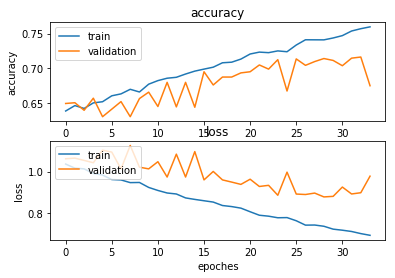

In [104]:
plot_history(history1)

In [105]:
history2 = vgg_model.fit(partial_x_train, partial_y_train, batch_size = 80, epochs = 40, verbose = 1, callbacks=callbacks_list , validation_split = 0.1)

Train on 16560 samples, validate on 1840 samples
Epoch 1/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.6782 - acc: 0.7624 - val_loss: 0.9216 - val_acc: 0.7027

Epoch 00001: val_acc did not improve from 0.71630
Epoch 2/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.6736 - acc: 0.7644 - val_loss: 0.8958 - val_acc: 0.7207

Epoch 00002: val_acc improved from 0.71630 to 0.72065, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_02-0.72.hdf5
Epoch 3/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.6668 - acc: 0.7667 - val_loss: 0.9001 - val_acc: 0.7130

Epoch 00003: val_acc did not improve from 0.72065
Epoch 4/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.6556 - acc: 0.7735 - val_loss: 0.8897 - val_acc: 0.7179

Epoch 00004: val_acc did not improve from 0.72065
Epoch 5/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.6492 

In [ ]:
plot_history(history2)

In [106]:
import time
from keras.callbacks import ModelCheckpoint,TensorBoard, EarlyStopping

# checkpoint
filepath="/media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
#earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
#callbacks_list.append(earlystopping)
#tensorboard visulaization
tensorboard = TensorBoard(log_dir='/media/barath/DE3669CE3669A7EB/shruthi_636/logs_regclass/{}'.format(time.time()))
callbacks_list.append(tensorboard)

In [107]:
history2 = vgg_model.fit(partial_x_train, partial_y_train, batch_size = 80, epochs = 40, verbose = 1, callbacks=callbacks_list , validation_split = 0.1)

Train on 16560 samples, validate on 1840 samples
Epoch 1/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.5990 - acc: 0.7909 - val_loss: 0.8845 - val_acc: 0.7228

Epoch 00001: val_acc improved from -inf to 0.72283, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_01-0.72.hdf5
Epoch 2/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.6017 - acc: 0.7905 - val_loss: 0.9206 - val_acc: 0.7168

Epoch 00002: val_acc did not improve from 0.72283
Epoch 3/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.5791 - acc: 0.7953 - val_loss: 0.9775 - val_acc: 0.7060

Epoch 00003: val_acc did not improve from 0.72283
Epoch 4/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.5774 - acc: 0.7979 - val_loss: 0.8515 - val_acc: 0.7375

Epoch 00004: val_acc improved from 0.72283 to 0.73750, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/

16560/16560 [==============================] - 53s 3ms/step - loss: 0.3799 - acc: 0.8656 - val_loss: 0.8703 - val_acc: 0.7495

Epoch 00040: val_acc did not improve from 0.77391


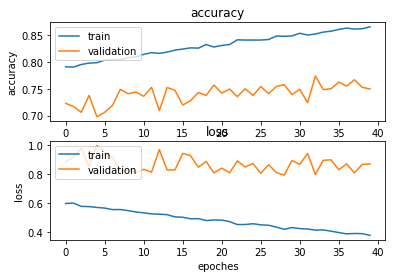

In [108]:
plot_history(history2)

In [109]:
history3 = vgg_model.fit(partial_x_train, partial_y_train, batch_size = 80, epochs = 40, verbose = 1, callbacks=callbacks_list , validation_split = 0.1)

Train on 16560 samples, validate on 1840 samples
Epoch 1/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.3730 - acc: 0.8665 - val_loss: 0.8463 - val_acc: 0.7674

Epoch 00001: val_acc did not improve from 0.77391
Epoch 2/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.3687 - acc: 0.8706 - val_loss: 0.8480 - val_acc: 0.7674

Epoch 00002: val_acc did not improve from 0.77391
Epoch 3/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.3638 - acc: 0.8726 - val_loss: 0.9230 - val_acc: 0.7424

Epoch 00003: val_acc did not improve from 0.77391
Epoch 4/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.3617 - acc: 0.8718 - val_loss: 0.8684 - val_acc: 0.7543

Epoch 00004: val_acc did not improve from 0.77391
Epoch 5/40
16560/16560 [==============================] - 52s 3ms/step - loss: 0.3597 - acc: 0.8747 - val_loss: 0.9288 - val_acc: 0.7462

Epoch 00005: val_acc did not improve from 0.77391
Epoch 6/40


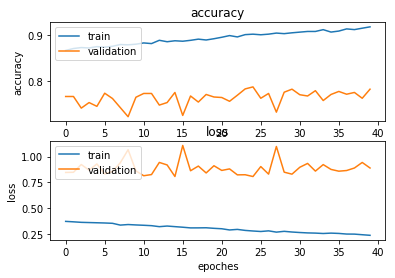

In [110]:
plot_history(history3)

In [31]:
from keras.models import load_model
resume_model = load_model('/media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_25-0.79.hdf5')

Train on 16560 samples, validate on 1840 samples
Epoch 1/40
16560/16560 [==============================] - 30s 2ms/step - loss: 0.4785 - acc: 0.8498 - val_loss: 0.2616 - val_acc: 0.9353

Epoch 00001: val_acc improved from -inf to 0.93533, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_01-0.94.hdf5
Epoch 2/40
16560/16560 [==============================] - 29s 2ms/step - loss: 0.4511 - acc: 0.8558 - val_loss: 0.2707 - val_acc: 0.9288

Epoch 00002: val_acc did not improve from 0.93533
Epoch 3/40
16560/16560 [==============================] - 29s 2ms/step - loss: 0.4303 - acc: 0.8612 - val_loss: 0.2598 - val_acc: 0.9359

Epoch 00003: val_acc improved from 0.93533 to 0.93587, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_03-0.94.hdf5
Epoch 4/40
16560/16560 [==============================] - 29s 2ms/step - loss: 0.4260 - acc: 0.8626 - val_loss: 0.2584 - val_acc: 0.9321

Epoch 00004: val_acc did n

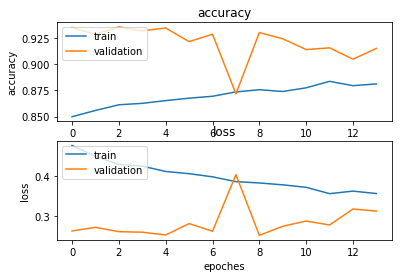

In [29]:
resume_history = resume_model.fit(partial_x_train, partial_y_train, batch_size = 80, epochs = 40, verbose = 1, callbacks=callbacks_list , validation_split = 0.1)
plot_history(resume_history)

In [33]:
resume_model1 = load_model('/media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_03-0.94.hdf5')

Train on 16560 samples, validate on 1840 samples
Epoch 1/40
16560/16560 [==============================] - 29s 2ms/step - loss: 0.4266 - acc: 0.8635 - val_loss: 0.3019 - val_acc: 0.9114

Epoch 00001: val_acc improved from -inf to 0.91141, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_01-0.91.hdf5
Epoch 2/40
16560/16560 [==============================] - 29s 2ms/step - loss: 0.4174 - acc: 0.8632 - val_loss: 0.3038 - val_acc: 0.9136

Epoch 00002: val_acc improved from 0.91141 to 0.91359, saving model to /media/barath/DE3669CE3669A7EB/shruthi_636/training_result_regclass/full_model_02-0.91.hdf5
Epoch 3/40
16560/16560 [==============================] - 29s 2ms/step - loss: 0.4148 - acc: 0.8675 - val_loss: 0.3497 - val_acc: 0.8924

Epoch 00003: val_acc did not improve from 0.91359
Epoch 4/40
16560/16560 [==============================] - 29s 2ms/step - loss: 0.4066 - acc: 0.8678 - val_loss: 0.3093 - val_acc: 0.9141

Epoch 00004: val_acc impro

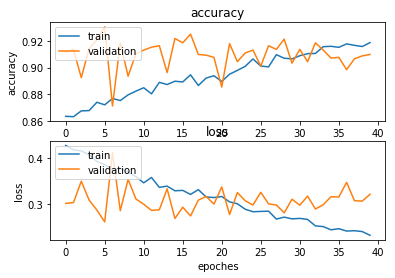

In [34]:
resume_history1 = resume_model1.fit(partial_x_train, partial_y_train, batch_size = 80, epochs = 40, verbose = 1, callbacks=callbacks_list , validation_split = 0.1)
plot_history(resume_history1)